# Cognifyz Data Analyst Internship

# Level 3

## Task 1 : Restaurant Reviews

#### Analyze the text reviews to identify the most common positive and negative keywords.

In [1]:
import pandas as pd
df = pd.read_csv(r"C:\Users\Suraj Jagtap\Desktop\Dataset  (1).csv")
df.head(5)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [2]:
import nltk

# Download the necessary resources
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('opinion_lexicon')

[nltk_data] Downloading package punkt_tab to C:\Users\Suraj
[nltk_data]     Jagtap\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Suraj
[nltk_data]     Jagtap\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package opinion_lexicon to C:\Users\Suraj
[nltk_data]     Jagtap\AppData\Roaming\nltk_data...
[nltk_data]   Package opinion_lexicon is already up-to-date!


True

Most common positive words: [('good', 3179), ('excellent', 301)]
Most common negative words: [('poor', 186)]


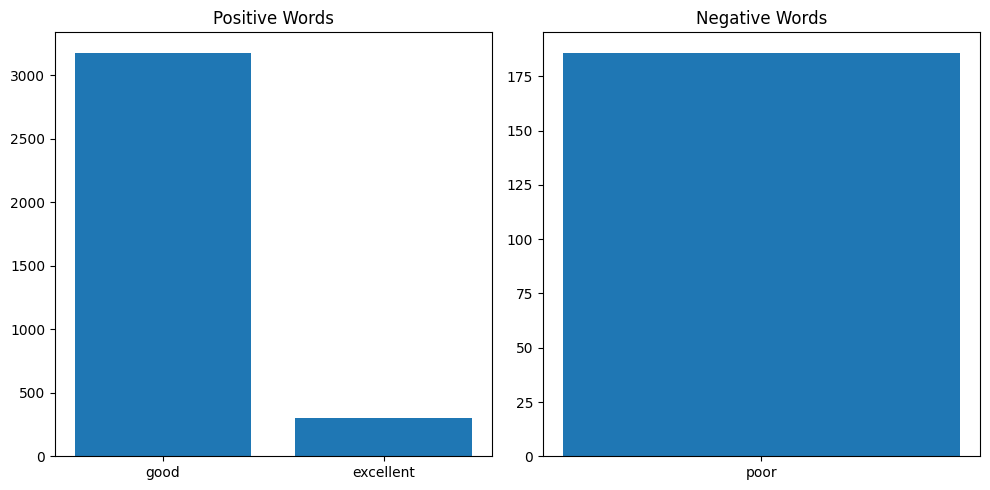

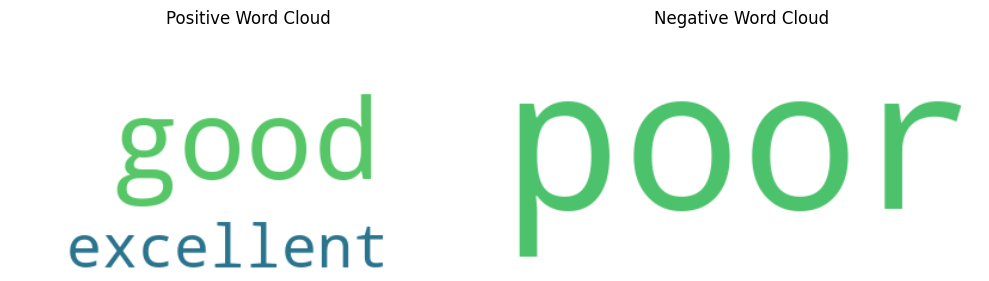

In [3]:
import re
from collections import Counter
import matplotlib.pyplot as plt
from nltk.corpus import stopwords, opinion_lexicon
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud


# Function to preprocess text
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)
    words = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]
    return words

# Apply preprocessing
df['Processed Review'] = df['Rating text'].apply(preprocess_text)

# Load positive and negative words
positive_words = set(opinion_lexicon.positive())
negative_words = set(opinion_lexicon.negative())

# Count positive and negative words
all_pos_words = []
all_neg_words = []

for words in df['Processed Review']:
    for word in words:
        if word in positive_words:
            all_pos_words.append(word)
        elif word in negative_words:
            all_neg_words.append(word)


# Get the most common positive and negative words
pos_word_freq = Counter(all_pos_words)
neg_word_freq = Counter(all_neg_words)

# Display the most common words
print("Most common positive words:", pos_word_freq.most_common(5))
print("Most common negative words:", neg_word_freq.most_common(5))

# Plot the results
plt.figure(figsize=(10, 5))

# Positive Words Bar Chart
plt.subplot(1, 2, 1)
plt.bar(*zip(*pos_word_freq.most_common(5)))
plt.title('Positive Words')

# Negative Words Bar Chart
plt.subplot(1, 2, 2)
plt.bar(*zip(*neg_word_freq.most_common(5)))
plt.title('Negative Words')

plt.tight_layout()
plt.show()

# Optional: Word cloud visualization
pos_wordcloud = WordCloud(width=400, height=200, background_color='white').generate_from_frequencies(pos_word_freq)
neg_wordcloud = WordCloud(width=400, height=200, background_color='white').generate_from_frequencies(neg_word_freq)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(pos_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Positive Word Cloud')

plt.subplot(1, 2, 2)
plt.imshow(neg_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Negative Word Cloud')

plt.tight_layout()
plt.show()

#### Calculate the average length of reviews and explore if there is a relationship between review length and rating.

Average review length: 7.020730813527379 characters


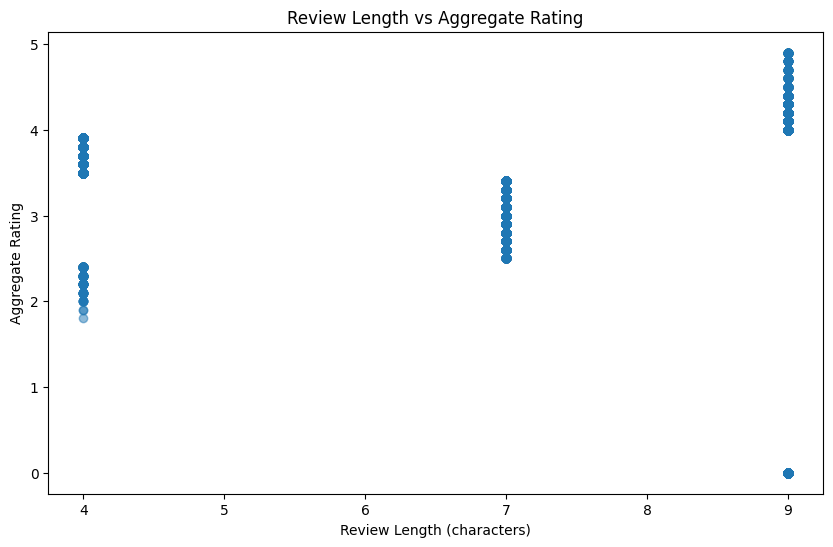


Correlation between Review Length and Aggregate Rating:
                  Review Length  Aggregate rating
Review Length          1.000000         -0.478885
Aggregate rating      -0.478885          1.000000


In [4]:

# Step 1: Calculate the length of each review 
df['Review Length'] = df['Rating text'].apply(len)

# Step 2: Calculate the average review length
average_review_length = df['Review Length'].mean()
print(f"Average review length: {average_review_length} characters")

# Step 3: Explore the relationship between review length and rating
plt.figure(figsize=(10, 6))

# Scatter plot to explore the relationship
plt.scatter(df['Review Length'], df['Aggregate rating'], alpha=0.5)
plt.title('Review Length vs Aggregate Rating')
plt.xlabel('Review Length (characters)')
plt.ylabel('Aggregate Rating')
plt.show()

# Step 4: Calculate the correlation between review length and rating
correlation = df[['Review Length', 'Aggregate rating']].corr()
print("\nCorrelation between Review Length and Aggregate Rating:")
print(correlation)


# Task 2 : Votes Analysis

#### Identify the restaurants with the highest and lowest number of votes

In [5]:
# Step 1: Get the top 25 restaurants with the highest number of votes
top_25_highest_votes = df.sort_values(by='Votes', ascending=False).head(25)

# Step 2: Get the top 25 restaurants with the lowest number of votes
top_25_lowest_votes = df.sort_values(by='Votes', ascending=True).head(25)

# Step 3: Display the results

print("Top 25 Restaurants with the Highest Number of Votes:")
print(top_25_highest_votes[['Restaurant Name', 'Votes']])

print("\nTop 25 Restaurants with the Lowest Number of Votes:")
print(top_25_lowest_votes[['Restaurant Name', 'Votes']])


Top 25 Restaurants with the Highest Number of Votes:
                           Restaurant Name  Votes
728                                   Toit  10934
735                               Truffles   9667
3994                      Hauz Khas Social   7931
2412                             Peter Cat   7574
739              AB's - Absolute Barbecues   6907
2414                       Barbeque Nation   5966
743                            Big Brewsky   5705
2307             AB's - Absolute Barbecues   5434
736                        The Black Pearl   5385
2411                                 BarBQ   5288
3110                       Saravana Bhavan   5172
2480                          Joey's Pizza   5145
4638                             Big Chill   4986
3085                        Warehouse Cafe   4914
4178                               Karim's   4689
2410                               Mocambo   4464
1252                            Farzi Cafe   4385
6144                                Gulati   43

#### Analyze if there is a correlation between the number of votes and the rating of a restaurant.

In [6]:
# Step 1: Calculate the correlation between 'Votes' and 'Aggregate rating'
correlation = df[['Votes', 'Aggregate rating']].corr()

# Step 2: Display the correlation matrix
print(correlation)


                     Votes  Aggregate rating
Votes             1.000000          0.313691
Aggregate rating  0.313691          1.000000


# Task 3 : Price Range vs. Online Delivery and Table Booking

#### Analyze if there is a relationship between the price range and the availability of online delivery and table booking.

In [7]:
A_df = pd.read_csv(r"C:\Users\Suraj Jagtap\Desktop\Dataset  (1).csv")
A_df.head(5)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [8]:
A_df['Has Online delivery']

0       No
1       No
2       No
3       No
4       No
        ..
9546    No
9547    No
9548    No
9549    No
9550    No
Name: Has Online delivery, Length: 9551, dtype: object

In [9]:
A_df['Has Table booking']

0       Yes
1       Yes
2       Yes
3        No
4       Yes
       ... 
9546     No
9547     No
9548     No
9549     No
9550     No
Name: Has Table booking, Length: 9551, dtype: object

   Price range  Has Online delivery  Has Table booking
0            1            15.774077           0.022502
1            2            41.310633           7.677482
2            3            29.190341          45.738636
3            4             9.044369          46.757679


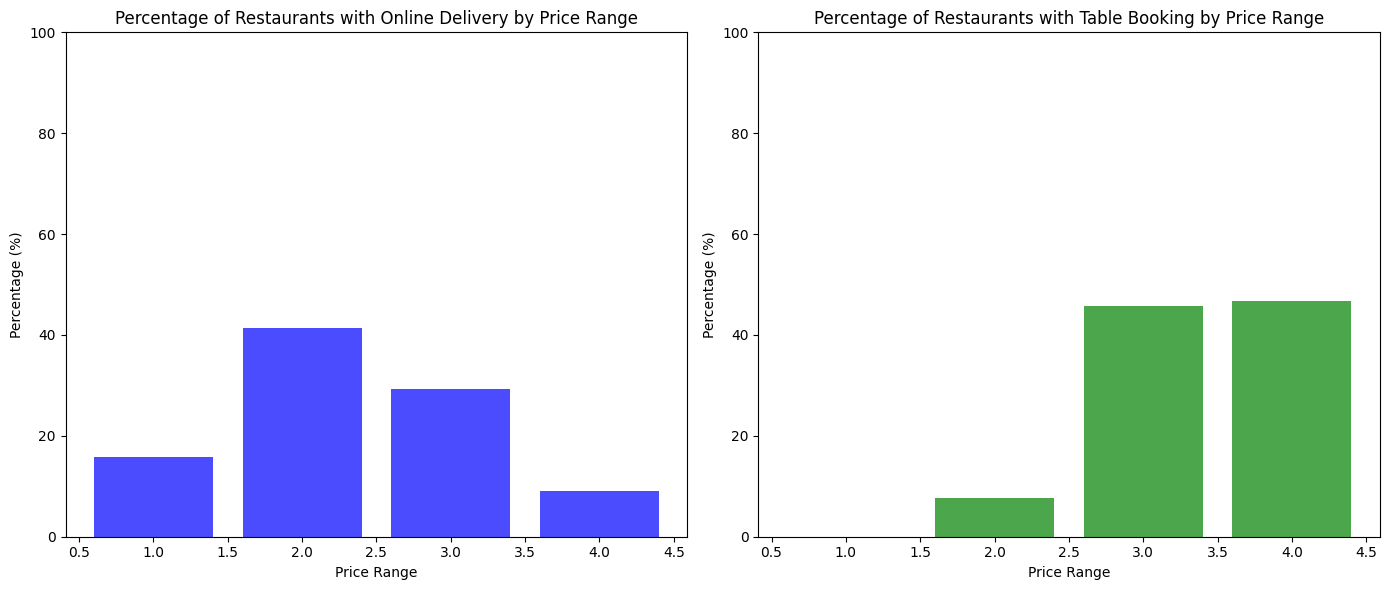

In [10]:
# Step 1: Convert 'yes'/'no' to boolean (True/False)
A_df['Has Online delivery'] = A_df['Has Online delivery'].map({'Yes': True, 'No': False})
A_df['Has Table booking'] = A_df['Has Table booking'].map({'Yes': True, 'No': False})

# Step 2: Group by 'Price Range' and calculate the percentage of restaurants offering online delivery and table booking
price_group = A_df.groupby('Price range').agg({
    'Has Online delivery': 'mean',
    'Has Table booking': 'mean'
}).reset_index()

# Convert the mean to percentage
price_group['Has Online delivery'] = price_group['Has Online delivery'] * 100
price_group['Has Table booking'] = price_group['Has Table booking'] * 100

# Display the results
print(price_group)

# Step 3: Visualize the relationship with bar plots
plt.figure(figsize=(14, 6))

# Plot for Online Delivery
plt.subplot(1, 2, 1)
plt.bar(price_group['Price range'], price_group['Has Online delivery'], color='blue', alpha=0.7)
plt.title('Percentage of Restaurants with Online Delivery by Price Range')
plt.xlabel('Price Range')
plt.ylabel('Percentage (%)')
plt.ylim(0, 100)

# Plot for Table Booking
plt.subplot(1, 2, 2)
plt.bar(price_group['Price range'], price_group['Has Table booking'], color='green', alpha=0.7)
plt.title('Percentage of Restaurants with Table Booking by Price Range')
plt.xlabel('Price Range')
plt.ylabel('Percentage (%)')
plt.ylim(0, 100)

plt.tight_layout()
plt.show()

#### Determine if higher-priced restaurants are more likely to offer these services.

Average percentage of online delivery in higher-priced restaurants: 19.12%
Average percentage of table booking in higher-priced restaurants: 46.25%
Average percentage of online delivery in lower-priced restaurants: 28.54%
Average percentage of table booking in lower-priced restaurants: 3.85%


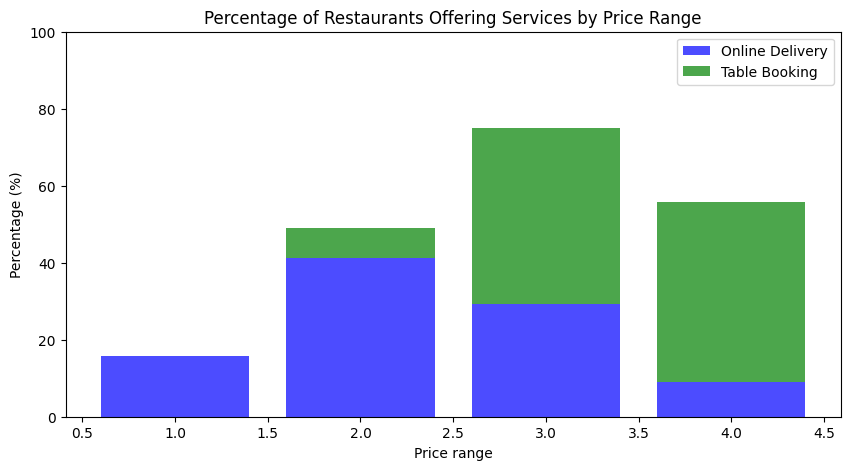

In [11]:
# Determine if higher-priced restaurants are more likely to offer these services
higher_price_ranges = price_group[price_group['Price range'] >= 3]  
lower_price_ranges = price_group[price_group['Price range'] < 3]   

avg_online_delivery_high = higher_price_ranges['Has Online delivery'].mean()
avg_table_booking_high = higher_price_ranges['Has Table booking'].mean()

avg_online_delivery_low = lower_price_ranges['Has Online delivery'].mean()
avg_table_booking_low = lower_price_ranges['Has Table booking'].mean()

print(f"Average percentage of online delivery in higher-priced restaurants: {avg_online_delivery_high:.2f}%")
print(f"Average percentage of table booking in higher-priced restaurants: {avg_table_booking_high:.2f}%")
print(f"Average percentage of online delivery in lower-priced restaurants: {avg_online_delivery_low:.2f}%")
print(f"Average percentage of table booking in lower-priced restaurants: {avg_table_booking_low:.2f}%")

# Visualization
plt.figure(figsize=(10, 5))

plt.bar(price_group['Price range'], price_group['Has Online delivery'], color='blue', alpha=0.7, label='Online Delivery')
plt.bar(price_group['Price range'], price_group['Has Table booking'], color='green', alpha=0.7, label='Table Booking', bottom=price_group['Has Online delivery'])

plt.title('Percentage of Restaurants Offering Services by Price Range')
plt.xlabel('Price range')
plt.ylabel('Percentage (%)')
plt.ylim(0, 100)
plt.legend()

plt.show()